Kütüphaneler

In [1]:
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import preprocessing
from sklearn.pipeline import Pipeline

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

from xgboost import XGBClassifier

from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, accuracy_score, classification_report, f1_score
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, accuracy_score,roc_auc_score, roc_curve,auc

import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")

Dataseti

In [8]:
df = pd.read_excel("dataset_deneme.xlsx")
df.head()


,comment,label
0,I've never rolled my eyes so much during a movie,1
1,Too many people are idiots.,1
2,I Saved My 1 For This Film,1
3,One word .... nauseating,1
4,Artificial movie for an idiotic generation...,1


In [9]:
#df = pd.read_excel("movieName.xlsx")
#print(df)

Dataseti Bilgisi

In [4]:
df.info()
        

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Filmler  20 non-null     object
dtypes: object(1)
memory usage: 288.0+ bytes


In [5]:
df.describe()

,Filmler
count,20
unique,20
top,Aynı Yıldızın Altında
freq,1


In [11]:
for i in range(len(df.columns)):
    print("{0} sütun : ".format(i+1),df.columns[i])

1 sütun :  comment
2 sütun :  label


In [12]:
X = df['comment']
y = df['label'] 
        
labelEncoding = preprocessing.LabelEncoder()
y = labelEncoding.fit_transform(y)

In [15]:
def cleaner(self,data):
    # DATA CLEANING
    print("Data Cleaning")
    for idx in range(len(data.comment)):
        data.comment[idx] = self.cleanText(str(data.comment[idx]))
        if idx % 250 == 0:
            print(idx)
        
    print("\nEksik/Boş Veriler")
    print(data.isna().sum())
    print()
    #Boş değerler içeren satırlar bırakıldı. (Drop edildi.)
    data = data.dropna(how='any')
        
    return data
        

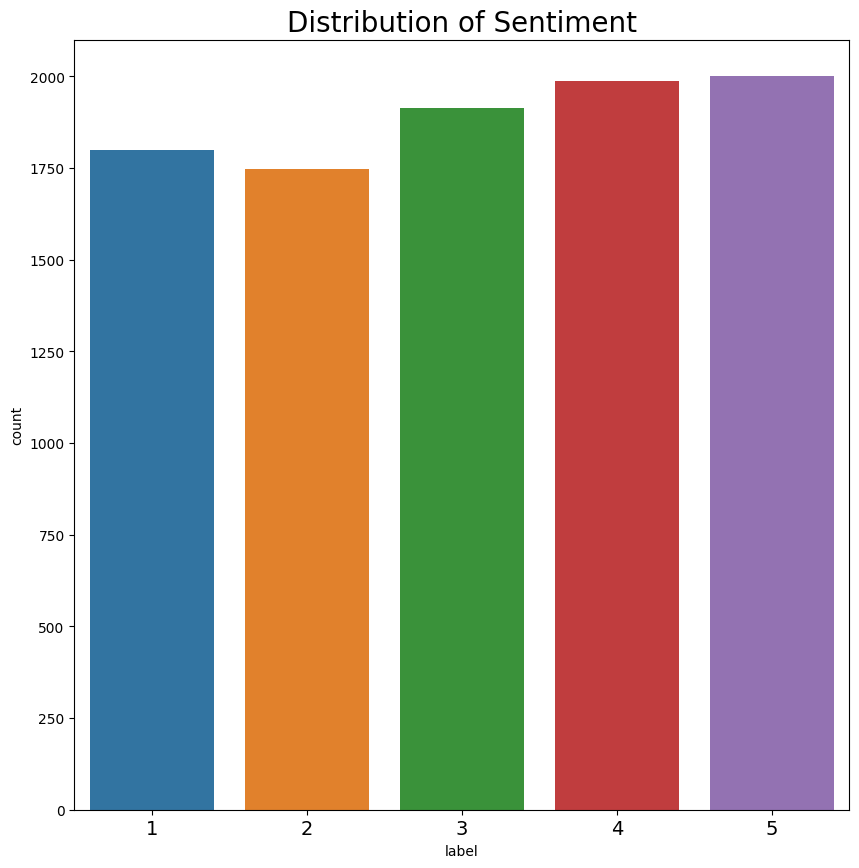

In [14]:
plt.figure(figsize = (10,10))
sns.countplot(x='label', data=df)
plt.xticks(size = 14, rotation=0)
plt.title('Distribution of Sentiment', size = 20)
plt.show()
